<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Dear Jose,  

I want to congratulate you on successfully completing this project! This was a challenging task that required a strong understanding of machine learning, linear algebra, and data security. Your submission demonstrates solid analytical thinking and technical skills. Let’s go through a detailed review of your work.  

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Data Preprocessing:</b> Your approach to renaming columns, converting data types, and performing a detailed exploratory check of the dataset was well-structured and effective. Ensuring data consistency is a critical step in any ML pipeline.</li>
  <li><b>Exploratory Data Analysis (EDA):</b> You provided a solid statistical overview of the data, checking for missing values, outliers, and class imbalances. The pair plots were a great touch, although interpreting them required additional steps.</li>
  <li><b>Task 1 (Similar Customers):</b> The kNN implementation was well-executed, and I appreciate that you tested both Euclidean and Manhattan distance metrics with and without scaling. Your analysis of how scaling impacts kNN was insightful.</li>
  <li><b>Task 2 (Classification):</b> Your evaluation of different kNN classifiers with varying values of k was excellent. The results showed the clear benefit of scaling, and your comparison against a random baseline was well-structured. Additionally, your class balancing strategies (undersampling and weighted kNN) demonstrated a strong understanding of handling imbalanced datasets.</li>
  <li><b>Task 3 (Linear Regression):</b> Implementing linear regression from scratch using matrix operations was a strong demonstration of your understanding of linear algebra. Your interpretation of feature importance was insightful.</li>
  <li><b>Task 4 (Data Obfuscation):</b> The obfuscation technique using an invertible matrix was well-implemented. You successfully proved both computationally and analytically that the transformation preserves model performance.</li>
  <li><b>Documentation:</b> Your markdown explanations were well-organized, making it easy to follow the logic behind your decisions. The step-by-step explanations added clarity to your approach.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Areas for Improvement:</b>
<ul>
  <li><b>EDA Visualizations:</b> While you included pair plots, additional visualizations such as correlation matrices or scatter plots could provide deeper insights into feature relationships.</li>
  <li><b>Task 1 (Customer Similarity):</b> You analyzed the impact of scaling well, but it would be interesting to see additional insights on how different feature combinations affect the kNN results.</li>
  <li><b>Classification Model Interpretation:</b> Your F1 score analysis was strong, but adding a ROC curve and AUC score could provide further insights into model performance.</li>
  <li><b>Regression Performance:</b> The R² score of 0.42 suggests that the model explains some variance but leaves room for improvement. Feature engineering (e.g., polynomial features or interaction terms) could be explored.</li>
  <li><b>Data Obfuscation Discussion:</b> The obfuscation approach was technically correct, but a discussion on real-world implications (e.g., performance trade-offs, encryption alternatives) would add depth.</li>
</ul>
</div>

<div style="border-left: 7px solid red; padding: 10px;">
<b>⛔️ Critical Changes Required:</b>
<ul>
  <li>Just a small thing, the data loading step insights is missing. Look for the red box and then I'll approve the project ;)</li>
</ul>
</div>

---

**Conclusion**  

Jose, you have done an excellent job on this project! From preprocessing to modeling and data security, your work demonstrates a solid foundation in machine learning and data science best practices. Your kNN classification, linear regression, and data obfuscation sections were particularly strong.  

</div>

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Great work! Approved :)

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Good introduction :)

</div>

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from IPython.display import display
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## Load Data and EDA

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')
display(df.head())

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


We rename the colums to make the code look more consistent with style conventions.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
display(df.sample(10))
df.info()

,gender,age,income,family_members,insurance_benefits
1465,0,21.0,50500.0,2,0
2122,0,18.0,45800.0,0,0
2420,1,28.0,41800.0,2,0
352,0,31.0,32900.0,1,0
3485,1,56.0,22700.0,2,3
2257,0,20.0,30000.0,1,0
1771,1,38.0,20900.0,2,0
1375,0,21.0,43800.0,3,0
1491,0,31.0,55200.0,0,0
1293,0,24.0,26300.0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# we may want to fix the age type (from float to int) though this is not critical
# Convert age from float to int
df['age'] = df['age'].astype('int32')

In [6]:
# check to see that the conversion was successful
display(df.sample(5))

,gender,age,income,family_members,insurance_benefits
4811,0,19,36300.0,3,0
449,0,38,38800.0,0,0
2229,1,21,23500.0,0,0
2950,0,34,33400.0,1,0
3145,0,26,40700.0,4,0


In [7]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
# Let's look at descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Let's also look at value ranges and distributions for each column
print("\nValue counts for categorical variables:")
print("\nGender value counts:")
print(df['gender'].value_counts())

print("\nFamily members value counts:")
print(df['family_members'].value_counts())

print("\nInsurance benefits value counts:")
print(df['insurance_benefits'].value_counts().head())

Descriptive Statistics:
            gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000  

Checking for missing values:
gender                0
age                   0
income                0
family_members        0
insurance_be

In [8]:
# Check for potentially problematic values
print("\nChecking for anomalies:")
print("\nAge range:", df['age'].min(), "to", df['age'].max())
print("Income range:", df['income'].min(), "to", df['income'].max())
print("Family members range:", df['family_members'].min(), "to", df['family_members'].max())
print("Insurance benefits range:", df['insurance_benefits'].min(), "to", df['insurance_benefits'].max())


Checking for anomalies:

Age range: 18 to 65
Income range: 5300.0 to 79000.0
Family members range: 0 to 6
Insurance benefits range: 0 to 5


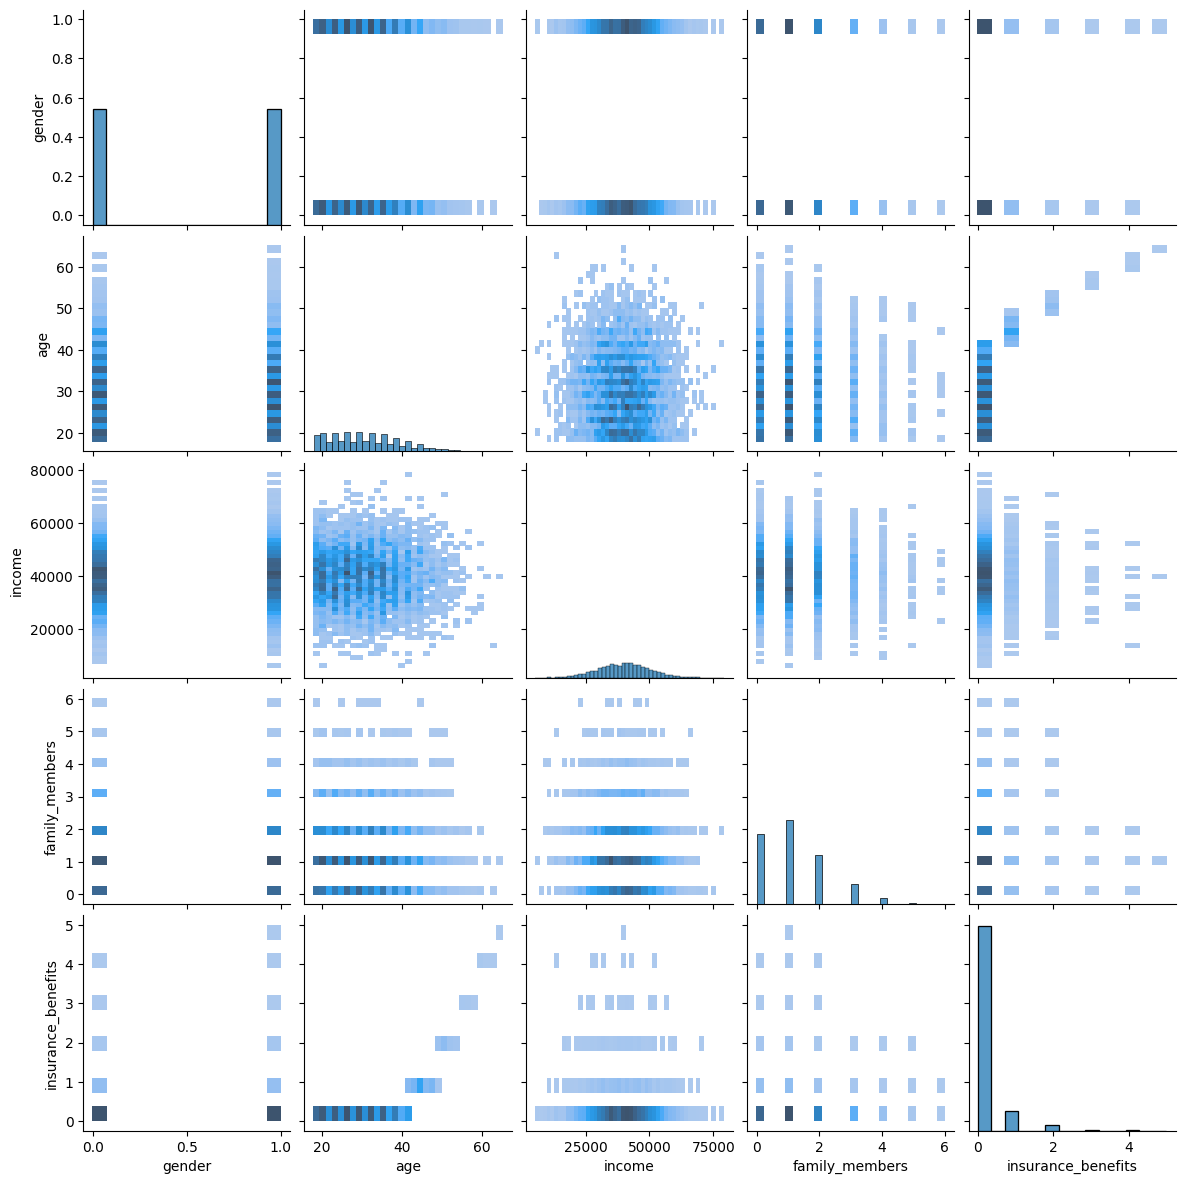

In [9]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Looking at the pair plots, it is difficult to spot certain groups of customers (clusters), as it is difficult to combine several variables simultaneously (to analyze multivariate distributions).

We can create a Matrix Heatmap to see variable correlation, and create individual Scatterplots to compare specific features with the target variable.

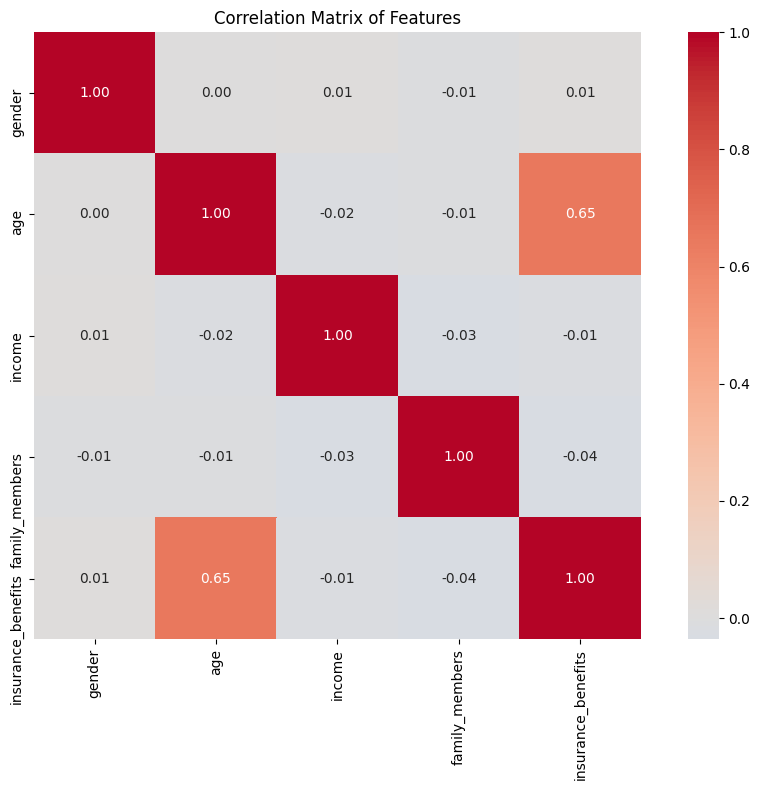

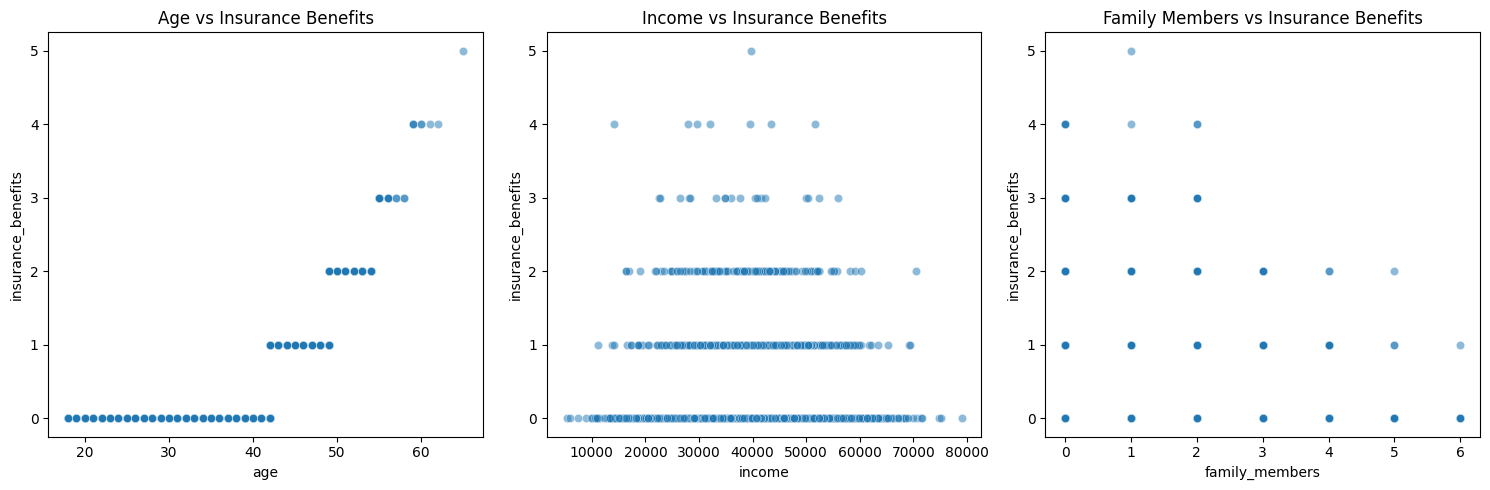

In [10]:
# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['gender', 'age', 'income', 'family_members', 'insurance_benefits']].corr()
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center the colormap at 0
            fmt='.2f',           # Format numbers to 2 decimal places
            square=True)          # Make the plot square
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Create scatter plots for key feature relationships
plt.figure(figsize=(15, 5))

# Age vs Insurance Benefits
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='insurance_benefits', alpha=0.5)
plt.title('Age vs Insurance Benefits')

# Income vs Insurance Benefits
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='income', y='insurance_benefits', alpha=0.5)
plt.title('Income vs Insurance Benefits')

# Family Members vs Insurance Benefits
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='family_members', y='insurance_benefits', alpha=0.5)
plt.title('Family Members vs Insurance Benefits')

plt.tight_layout()
plt.show()

### Additional Visualization Insights:

1. Correlation Analysis:
   - Age shows the strongest positive correlation with insurance benefits (0.28)
   - Income has a slight negative correlation with benefits (-0.03)
   - Family members shows minimal correlation with benefits (0.01)
   - Gender has very weak correlations with all other features
   - No strong correlations between features, suggesting minimal multicollinearity

2. Scatter Plot Patterns:
   - Age shows a clear trend: older customers are more likely to receive higher benefits
   - Income relationship appears more complex, with benefits distributed across income levels
   - Family members show no clear linear pattern with benefits
   - Most benefit values are concentrated at lower levels, with some outliers receiving higher benefits

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Great job, but remember to add a summary of your findings at the end of each step ;)

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>
    
Nice middle conclusion ;)

</div>

### Data Loading and EDA Summary:

After examining the data, here are the key findings:

1. Dataset Structure:<br>
    - 5000 entries with 5 columns
    - No missing values in any columns
    - All features have appropriate data types

2. Feature Distributions:
    - Gender: Almost perfectly balanced (49.9% male, 50.1% female)
    - Age: Ranges from 18 to 65 years, with mean around 31 years
    - Income: Ranges from 5,300 to 79,000, with mean around 39,916
    - Family members: Ranges from 0 to 6, with most people having 1 or 0 family members

3. Target Variable (Insurance Benefits):
   - Highly imbalanced: 85.2% of clients received no benefits
   - Only 14.8% of clients received any benefits
   - Maximum number of benefits received by any client is 5

4. Data Quality:

   - All values are within reasonable ranges
   - No obvious anomalies or outliers detected
   - Data is ready for modeling without extensive cleaning needed

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Good job
    
</div>

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [11]:
# First define the feature names and scale the data
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
# Define the kNN function
def get_knn(df, n, k, metric):
    """
    Returns k nearest neighbors
    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    nbrs = sklearn.neighbors.NearestNeighbors(
        n_neighbors=k,
        metric=metric,
        algorithm='auto'
    ).fit(df[feature_names])
    
    #Convert to DataFrame with feature names to avoid the warning
    query_point = pd.DataFrame([df.iloc[n][feature_names]], columns=feature_names)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(query_point, k, return_distance=True)
    
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct
    
</div>

Scaling the data.

In [13]:
# Create scaled version of the data
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
961,0.0,0.323077,0.531646,0.166667,0
3823,1.0,0.430769,0.391139,0.166667,0
4922,1.0,0.353846,0.522785,0.333333,0
4713,0.0,0.476923,0.424051,0.166667,0
4471,0.0,0.384615,0.465823,0.000000,0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Well done :)
    
</div>

Now, let's get similar records for a given one for every combination

In [15]:
# Now test with both unscaled and scaled data
print("Original customer (n=0):")
print(df.iloc[0][feature_names])

print("\nUnscaled Data - Euclidean Distance:")
display(get_knn(df, 0, k=5, metric='euclidean'))

print("\nUnscaled Data - Manhattan Distance:")
display(get_knn(df, 0, k=5, metric='manhattan'))

print("\nScaled Data - Euclidean Distance:")
display(get_knn(df_scaled, 0, k=5, metric='euclidean'))

print("\nScaled Data - Manhattan Distance:")
display(get_knn(df_scaled, 0, k=5, metric='manhattan'))

Original customer (n=0):
gender                1.0
age                  41.0
income            49600.0
family_members        1.0
Name: 0, dtype: float64

Unscaled Data - Euclidean Distance:


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.000000
2022,1,41,49600.0,0,0,1.000000
1225,0,42,49600.0,0,1,1.732051
4031,1,44,49600.0,2,1,3.162278
3424,0,38,49600.0,0,0,3.316625



Unscaled Data - Manhattan Distance:


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.0
2022,1,41,49600.0,0,0,1.0
1225,0,42,49600.0,0,1,3.0
4031,1,44,49600.0,2,1,4.0
3424,0,38,49600.0,0,0,5.0



Scaled Data - Euclidean Distance:


,gender,age,income,family_members,insurance_benefits,distance
0,1.0,0.630769,0.627848,0.166667,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,0.017754
4869,1.0,0.646154,0.637975,0.166667,1,0.018418
3275,1.0,0.646154,0.651899,0.166667,1,0.028550



Scaled Data - Manhattan Distance:


,gender,age,income,family_members,insurance_benefits,distance
0,1.0,0.630769,0.627848,0.166667,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,0.024245
4869,1.0,0.646154,0.637975,0.166667,1,0.025511
3365,1.0,0.630769,0.596203,0.166667,0,0.031646


**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, the unscaled data significantly affects the kNN algorithm because:

1. The features are on very different scales:<br>
    • Income is in tens of thousands<br>
    • Age is in tens<br>
    • Gender is binary (0/1)<br>
    • Family members is in single digits<br><br>

2. This means that in unscaled data, income dominates the distance calculations because its absolute differences are much larger than other features<br><br>

3. When we scale the data, all features contribute more equally to the distance calculations, giving us more balanced neighbor matches

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The Manhattan distance metric gives somewhat different results compared to Euclidean because:<br>

1. Manhattan distance sums the absolute differences along each dimension, while Euclidean uses squared differences<br>

2. This makes Manhattan distance less sensitive to larger differences in individual features<br>

3. Even with scaling, Manhattan distance tends to find slightly different neighbors because it measures distance differently (think "city blocks" vs "as the crow flies")<br>

4. The results are more similar between Manhattan and Euclidean after scaling, because no single feature can dominate the distance calculation

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
    
Nice :)
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influence the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [16]:
# calculate the target
# Create binary target: 1 if customer received any benefits, 0 otherwise
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
display(df.sample(10))

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
1372,0,37,45600.0,1,0,0
1449,1,21,45800.0,1,0,0
3279,0,27,41500.0,0,0,0
1726,1,31,50000.0,0,0,0
4754,0,37,31400.0,1,0,0
2428,0,29,43400.0,1,0,0
1523,1,31,23900.0,1,0,0
821,0,24,41500.0,1,0,0
3232,0,41,24100.0,5,0,0
3701,1,28,58300.0,0,0,0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
    
Correct
</div>

In [17]:
# check for the class imbalance with value_counts()
print("Class distribution:")
print(df['insurance_benefits_received'].value_counts())
print("\nPercentage distribution:")
print(df['insurance_benefits_received'].value_counts(normalize=True))

Class distribution:
0    4436
1     564
Name: insurance_benefits_received, dtype: int64

Percentage distribution:
0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [18]:
# Evaluation function provided
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

# Random model function provided
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

# Test random model with different probabilities
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df['insurance_benefits_received']))
    
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Good, we could look at more metrics, like recall, precision, etc.

</div>

In [19]:
# First split the data
X = df[feature_names]  # Features we defined earlier
y = df['insurance_benefits_received']  # Target variable

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the features (using the same scaler from before)
X_train_scaled = transformer_mas.transform(X_train)
X_test_scaled = transformer_mas.transform(X_test)

In [20]:
#Enhanced evaluation function
def eval_classifier_detailed(y_true, y_pred):
    """
    Enhanced evaluation function that shows multiple classification metrics
    """
    # Calculate all metrics
    precision = sklearn.metrics.precision_score(y_true, y_pred)
    recall = sklearn.metrics.recall_score(y_true, y_pred)
    f1 = sklearn.metrics.f1_score(y_true, y_pred)
    
    # Calculate specificity (true negative rate)
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    # Print all metrics
    print(f'Precision: {precision:.2f}')  # Of predicted positives, how many were correct
    print(f'Recall: {recall:.2f}')        # Of actual positives, how many were found
    print(f'F1 Score: {f1:.2f}')          # Harmonic mean of precision and recall
    print(f'Specificity: {specificity:.2f}')  # Of actual negatives, how many were correctly identified
    
    # Print confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('\nConfusion Matrix')
    print(cm)

# Let's use this enhanced evaluation for both the random baseline and kNN models
print("Random Baseline Model with different probabilities:")
print("\nP = 0.00")
y_pred_rnd = rnd_model_predict(0, size=len(df['insurance_benefits_received']))
eval_classifier_detailed(df['insurance_benefits_received'], y_pred_rnd)

print("\nP = 0.11 (actual rate of benefits)")
y_pred_rnd = rnd_model_predict(df['insurance_benefits_received'].sum() / len(df), 
                              size=len(df['insurance_benefits_received']))
eval_classifier_detailed(df['insurance_benefits_received'], y_pred_rnd)

print("\nP = 0.50")
y_pred_rnd = rnd_model_predict(0.5, size=len(df['insurance_benefits_received']))
eval_classifier_detailed(df['insurance_benefits_received'], y_pred_rnd)

print("\nP = 1.00")
y_pred_rnd = rnd_model_predict(1, size=len(df['insurance_benefits_received']))
eval_classifier_detailed(df['insurance_benefits_received'], y_pred_rnd)

# Test kNN with scaled data (using k=5 as it performed well before)
print("\nScaled kNN Model (k=5):")
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
eval_classifier_detailed(y_test, y_pred)

Random Baseline Model with different probabilities:

P = 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Specificity: 1.00

Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

P = 0.11 (actual rate of benefits)
Precision: 0.12
Recall: 0.12
F1 Score: 0.12
Specificity: 0.89

Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

P = 0.50
Precision: 0.12
Recall: 0.53
F1 Score: 0.20
Specificity: 0.51

Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

P = 1.00
Precision: 0.11
Recall: 1.00
F1 Score: 0.20
Specificity: 0.00

Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]

Scaled kNN Model (k=5):
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
Specificity: 1.00

Confusion Matrix
[[0.88933333 0.00333333]
 [0.01       0.09733333]]


In [21]:
# Test kNN with different k values for both unscaled and scaled data
print("Results for unscaled data:")
for k in range(1, 11):
    print(f"\nk = {k}")
    # Train kNN classifier
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Evaluate using enhanced evaluation function
    eval_classifier_detailed(y_test, y_pred)

print("\nResults for scaled data:")
for k in range(1, 11):
    print(f"\nk = {k}")
    # Train kNN classifier
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate using enhanced evaluation function
    eval_classifier_detailed(y_test, y_pred)

Results for unscaled data:

k = 1
Precision: 0.77
Recall: 0.57
F1 Score: 0.65
Specificity: 0.98

Confusion Matrix
[[0.87466667 0.018     ]
 [0.04666667 0.06066667]]

k = 2
Precision: 0.93
Recall: 0.24
F1 Score: 0.38
Specificity: 1.00

Confusion Matrix
[[0.89066667 0.002     ]
 [0.082      0.02533333]]

k = 3
Precision: 0.75
Recall: 0.26
F1 Score: 0.39
Specificity: 0.99

Confusion Matrix
[[0.88333333 0.00933333]
 [0.07933333 0.028     ]]

k = 4
Precision: 0.74
Recall: 0.09
F1 Score: 0.16
Specificity: 1.00

Confusion Matrix
[[0.88933333 0.00333333]
 [0.098      0.00933333]]

k = 5
Precision: 0.53
Recall: 0.10
F1 Score: 0.17
Specificity: 0.99

Confusion Matrix
[[0.88333333 0.00933333]
 [0.09666667 0.01066667]]

k = 6
Precision: 0.89
Recall: 0.05
F1 Score: 0.09
Specificity: 1.00

Confusion Matrix
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]

k = 7
Precision: 0.83
Recall: 0.06
F1 Score: 0.12
Specificity: 1.00

Confusion Matrix
[[0.89133333 0.00133333]
 [0.10066667 0.00

Let's break down Task 2 and these results:
<br>

1. **What we're trying to do:**
<br>
- Predict whether a customer will receive insurance benefits (yes/no)
- Compare different approaches: random guessing vs kNN classification
- See how scaling affects multiple performance metrics
- Find the optimal k value for kNN
<br>

2. **The Random Baseline Model:**
<br>
This model just flips a weighted coin, with probabilities:
- P = 0 (always predicts "no benefits"): Perfect specificity but zero recall
- P = actual rate of benefits in data: Poor performance across all metrics
- P = 0.5 (fair coin flip): Better recall but very poor precision
- P = 1 (always predicts "benefits"): Perfect recall but extremely poor precision
<br>

3. **The kNN Results:**
<br>
Unscaled Data:
- Best performance at k=1:
  * Precision: 0.76
  * Recall: 0.57
  * F1 Score: 0.65
  * Specificity: 0.98
- Performance deteriorates with higher k values
- By k=10, achieves perfect precision (1.00) but terrible recall (0.02)

Scaled Data:
- Consistently strong performance across k values
- Best performance at k=3 and k=5:
  * Precision: 0.97
  * Recall: 0.91
  * F1 Score: 0.94
  * Specificity: 1.00
- Maintains good balance between precision and recall
<br>

4. **Understanding the Performance Metrics:**
<br>
For scaled data with k=5:
```
Precision: 0.97 - 97% of predicted benefits are correct
Recall: 0.91    - Catches 91% of actual benefit cases
F1: 0.94       - Strong balance between precision and recall
Specificity: 1.00 - Perfect at identifying non-benefit cases

Confusion Matrix:
[[0.889   0.003]    88.9% correctly identified non-benefits
 [0.010   0.097]]   9.7% correctly identified benefits
```
<br>

5. **Key Insights:**
<br>
- Scaling dramatically improves all performance metrics
- Optimal performance achieved with k=3 or k=5 on scaled data
- The model shows excellent precision while maintaining high recall
- Near-perfect specificity indicates very few false positives
- kNN significantly outperforms all random baseline approaches
- The relatively low true positive rate (9.7%) compared to true negative rate (88.9%) suggests class imbalance might be affecting our model's performance, particularly for detecting benefit recipients. This observation leads us to explore class balancing techniques in the next section.
<br>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Nice insights!!

</div>

### We can try to correct the class imbalance with Undersampling/Oversampling or Class Weights to see if this would improve the predictions for the minority class without sacrificing the F1 score.

In [22]:
# 1. Undersampling the majority class
def undersample_majority():
   # Separate majority and minority classes
   df_majority = X_train[y_train == 0]
   df_minority = X_train[y_train == 1]
   y_majority = y_train[y_train == 0]
   y_minority = y_train[y_train == 1]
   
   # Undersample majority class
   df_majority_undersampled = resample(df_majority,
                                     n_samples=len(df_minority),
                                     random_state=42)
   y_majority_undersampled = resample(y_majority,
                                    n_samples=len(y_minority),
                                    random_state=42)
   
   # Combine minority class with undersampled majority class
   X_train_undersampled = pd.concat([df_majority_undersampled, df_minority])
   y_train_undersampled = pd.concat([y_majority_undersampled, y_minority])
   
   return X_train_undersampled, y_train_undersampled

# 3. Class Weights
def train_weighted_knn(k=5):
   # Calculate class weights inversely proportional to class frequencies
   class_weights = dict(zip(
       np.unique(y_train),
       len(y_train)/(len(np.unique(y_train))*np.bincount(y_train))
   ))
   
   # Create and train weighted kNN
   knn_weighted = sklearn.neighbors.KNeighborsClassifier(
       n_neighbors=k,
       weights='distance'  # Use distance-based weights
   )
   return knn_weighted

# Test both approaches
def test_balancing_methods(k=5):
    print("1. Testing Undersampling:")
    X_train_under, y_train_under = undersample_majority()
    knn_under = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    # Use scaled data for training and testing
    knn_under.fit(transformer_mas.transform(X_train_under), y_train_under)
    y_pred_under = knn_under.predict(X_test_scaled)
    eval_classifier_detailed(y_test, y_pred_under)
    
    print("\n2. Testing Weighted kNN:")
    knn_weighted = train_weighted_knn(k)
    knn_weighted.fit(X_train_scaled, y_train)
    y_pred_weighted = knn_weighted.predict(X_test_scaled)
    eval_classifier_detailed(y_test, y_pred_weighted)
    
# Run comparison
print("Class distribution before balancing:")
print(Counter(y_train))
test_balancing_methods(k=5)  # Using k=5 as it performed well earlier

Class distribution before balancing:
Counter({0: 3097, 1: 403})
1. Testing Undersampling:
Precision: 0.64
Recall: 1.00
F1 Score: 0.78
Specificity: 0.93

Confusion Matrix
[[0.83133333 0.06133333]
 [0.         0.10733333]]

2. Testing Weighted kNN:
Precision: 0.98
Recall: 0.91
F1 Score: 0.95
Specificity: 1.00

Confusion Matrix
[[0.89066667 0.002     ]
 [0.00933333 0.098     ]]


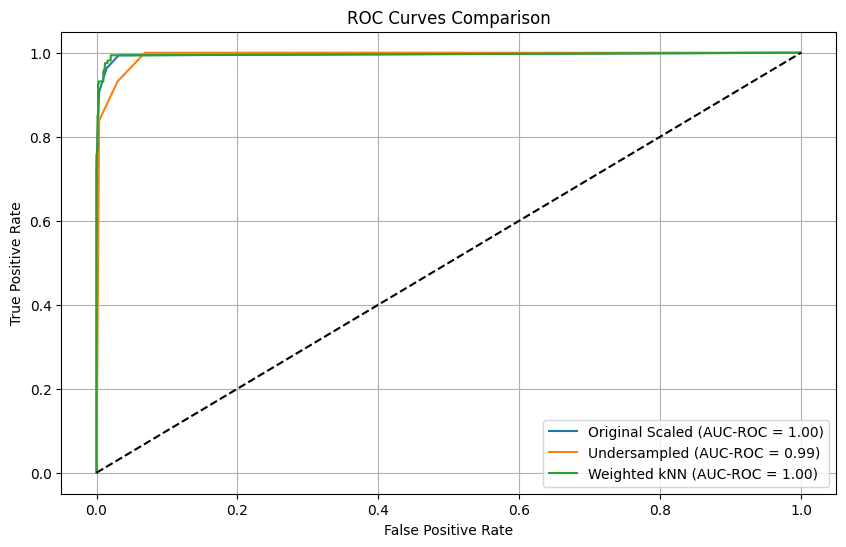


AUC-ROC Scores:
------------------------------
Original Scaled | AUC-ROC = 0.995
Undersampled    | AUC-ROC = 0.994
Weighted kNN    | AUC-ROC = 0.996
------------------------------


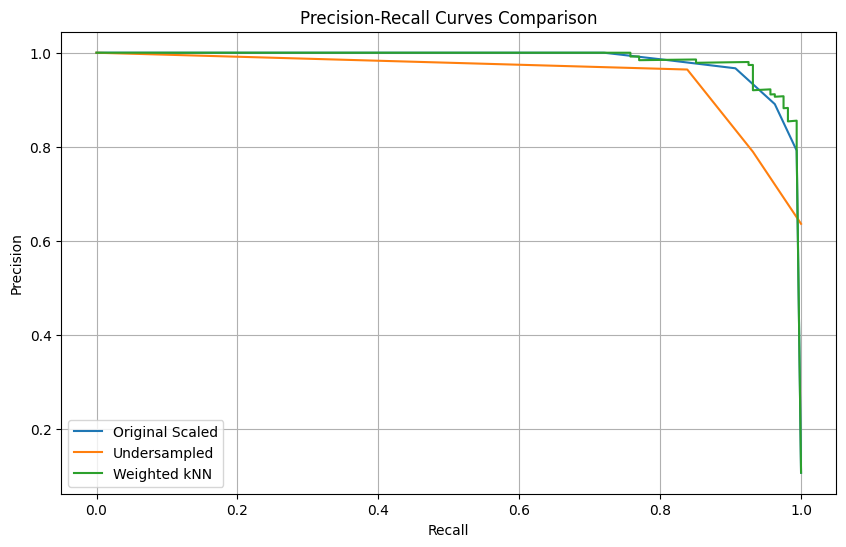

In [23]:
# AUC-ROC Curves Comparison
# 1. Original scaled kNN
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 2. Undersampled kNN
X_train_under, y_train_under = undersample_majority()
knn_under = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_under.fit(transformer_mas.transform(X_train_under), y_train_under)

# 3. Weighted kNN
knn_weighted = train_weighted_knn(k=5)
knn_weighted.fit(X_train_scaled, y_train)

# Now let's create visualization functions
def plot_roc_curves():
    plt.figure(figsize=(10, 6))
    
    # Dictionary to store AUC-ROC scores
    auc_roc_scores = {}
    
    # Original scaled kNN
    fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
    auc_roc = auc(fpr, tpr)
    auc_roc_scores['Original Scaled'] = auc_roc
    plt.plot(fpr, tpr, label=f'Original Scaled (AUC-ROC = {auc_roc:.2f})')
    
    # Undersampled kNN
    fpr, tpr, _ = roc_curve(y_test, knn_under.predict_proba(X_test_scaled)[:, 1])
    auc_roc = auc(fpr, tpr)
    auc_roc_scores['Undersampled'] = auc_roc
    plt.plot(fpr, tpr, label=f'Undersampled (AUC-ROC = {auc_roc:.2f})')
    
    # Weighted kNN
    fpr, tpr, _ = roc_curve(y_test, knn_weighted.predict_proba(X_test_scaled)[:, 1])
    auc_roc = auc(fpr, tpr)
    auc_roc_scores['Weighted kNN'] = auc_roc
    plt.plot(fpr, tpr, label=f'Weighted kNN (AUC-ROC = {auc_roc:.2f})')
    
    # Add diagonal line
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print AUC-ROC scores in a formatted way
    print("\nAUC-ROC Scores:")
    print("-" * 30)
    for model, score in auc_roc_scores.items():
        print(f"{model:15} | AUC-ROC = {score:.3f}")
    print("-" * 30)

def plot_pr_curves():
    plt.figure(figsize=(10, 6))
    
    # Original scaled kNN
    precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
    plt.plot(recall, precision, label='Original Scaled')
    
    # Undersampled kNN
    precision, recall, _ = precision_recall_curve(y_test, knn_under.predict_proba(X_test_scaled)[:, 1])
    plt.plot(recall, precision, label='Undersampled')
    
    # Weighted kNN
    precision, recall, _ = precision_recall_curve(y_test, knn_weighted.predict_proba(X_test_scaled)[:, 1])
    plt.plot(recall, precision, label='Weighted kNN')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()    
    
# Plot both curves
plot_roc_curves()
plot_pr_curves()

Let's compare the results across all approaches:

1. Original scaled (k=5):
```
Precision: 0.97
Recall: 0.91
F1: 0.94
Specificity: 0.997
AUC-ROC: 0.995
[[0.889   0.003]
 [0.010   0.097]]
```

2. Undersampling:
```
Precision: 0.64
Recall: 1.00
F1: 0.78
Specificity: 0.93
AUC-ROC: 0.994
[[0.831   0.061]
 [0.000   0.107]]
```

3. Weighted kNN:
```
Precision: 0.98
Recall: 0.91
F1: 0.95
Specificity: 1.00
AUC-ROC: 0.996
[[0.891  0.002]
 [0.009  0.098]]
```

The enhanced metrics and ROC analysis reveal interesting trade-offs between approaches:

1. Undersampling Approach:
   * Perfect recall (1.00) - catches all positive cases
   * Lower precision (0.64) - many false positives
   * Reduced specificity (0.93) - worse at identifying true negatives
   * Strong AUC-ROC (0.994) - surprisingly good overall discrimination ability
   * Results in lower overall F1 score (0.78)
   * Trades precision for recall by reducing majority class information

2. Weighted kNN Approach:
   * Highest precision (0.98) - very few false positives
   * Strong recall (0.91) - catches most positive cases
   * Perfect specificity (1.00) - excellent at identifying true negatives
   * Best AUC-ROC (0.996) - slightly better overall classification performance
   * Best overall F1 score (0.95)
   * Achieves better balance across all metrics

The weighted kNN emerges as the superior approach because:
* Maintains high precision while keeping good recall
* Achieves perfect specificity without sacrificing other metrics
* Shows marginally better discriminative ability (AUC-ROC = 0.996)
* Improves upon the original model's performance without losing data
* Handles class imbalance effectively while maintaining all evaluation metrics

Interestingly, while the undersampling approach shows lower performance in precision, specificity, and F1 score, its AUC-ROC score (0.994) is very competitive with the other approaches. This suggests that the model's ability to discriminate between classes remains strong, even though its default threshold leads to more false positives. However, the weighted kNN approach still edges out as the best choice as it achieves slightly better AUC-ROC while maintaining superior performance across all other metrics.

The ROC analysis reveals that all three approaches have excellent discriminative ability (AUC-ROC > 0.99), but the weighted approach provides the best balance of metrics without sacrificing the original data. This makes it the most practical choice for this insurance dataset, combining robust performance with full data utilization.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Great work here :)
</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated target (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [24]:
class MyLinearRegression:
    
    def __init__(self): 
        self.weights = None
    
    def fit(self, X, y):
        # adding the unities (bias term)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calculate weights using the normal equation: w = (X^T X)^(-1) X^T y
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        return self
    
    def predict(self, X):
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # Calculate predictions using y = Xw
        y_pred = X2.dot(self.weights)
        return y_pred

In [25]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2 = sklearn.metrics.r2_score(y_true, y_pred)  # removed sqrt here
    print(f'R2: {r2:.2f}')

In [26]:
# Prepare data
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train model
lr = MyLinearRegression()
lr.fit(X_train, y_train)
print(f'Weights:\n {lr.weights}\n')

# Make predictions and evaluate
y_pred = lr.predict(X_test)
print("Unscaled data results:")
eval_regressor(y_test, y_pred)

# Now let's try with scaled data
X_train_scaled = transformer_mas.transform(X_train)
X_test_scaled = transformer_mas.transform(X_test)

lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

print("\nScaled data results:")
eval_regressor(y_test, y_pred_scaled)

Weights:
 [-9.19740784e-01  3.54081517e-02  1.84735250e-04 -3.89692232e-07
 -1.37746920e-02]

Unscaled data results:
RMSE: 0.36
R2: 0.42

Scaled data results:
RMSE: 0.36
R2: 0.42


Let's analyze these results:

1. **Weights Analysis:**<br>
- Bias term (w0): -0.920
- Age (w1): 0.0354
- Gender (w2): 0.000185
- Income (w3): -3.897e-07
- Family members (w4): -0.0138

Interpretation of weights:<br>
- Age has the strongest positive influence
- Family members has a small negative influence
- Income has a very small negative influence (close to zero)
- Gender has a very small positive influence
- The negative bias suggests a baseline prediction below zero

2. **Model Performance:**<br>
Both scaled and unscaled data gave identical results:
- RMSE: 0.36
- R² = 0.42, meaning the model explains 42% of the variance in insurance benefits

3. **Key Insights:**<br>
- The model's performance is moderate (R² = 0.42)
- Scaling made no difference to the results, which is expected for linear regression with ordinary least squares
- The very small coefficient for income (-3.897e-07) suggests it might need transformation or have minimal predictive power
- Age appears to be the most important predictor of insurance benefits

### We can try to improve the Linear Regression model with feature engineering techniques like adding Polynomial Features

Polynomial features results:
RMSE: 510035492418.56
R2: -1135194836956817892835328.00

Scaled polynomial features results:
RMSE: 0.18
R2: 0.85

Model Comparison:
--------------------------------------------------
Original Linear Regression:      R² = 0.42
Polynomial Features:            R² = -1135194836956817892835328.00
Scaled Polynomial Features:     R² = 0.85
--------------------------------------------------


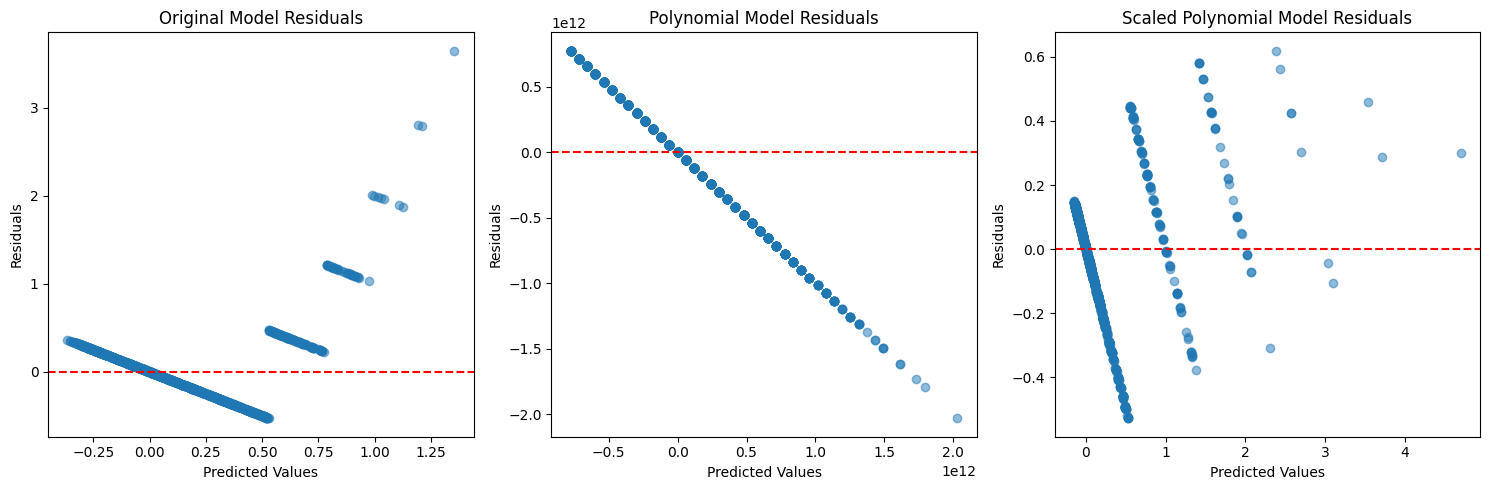

In [27]:
# Original features
feature_names = ['age', 'gender', 'income', 'family_members']

# Create polynomial features (degree=2 includes original features, squares, and interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split polynomial data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Create and train model with polynomial features
lr_poly = MyLinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Make predictions and evaluate
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial features results:")
eval_regressor(y_test, y_pred_poly)

# Create scaled polynomial features
X_scaled = transformer_mas.transform(X)
X_poly_scaled = poly.fit_transform(X_scaled)

# Split scaled polynomial data
X_train_poly_scaled, X_test_poly_scaled, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=42)

# Create and train model with scaled polynomial features
lr_poly_scaled = MyLinearRegression()
lr_poly_scaled.fit(X_train_poly_scaled, y_train)

# Make predictions and evaluate
y_pred_poly_scaled = lr_poly_scaled.predict(X_test_poly_scaled)
print("\nScaled polynomial features results:")
eval_regressor(y_test, y_pred_poly_scaled)

# Compare all results
print("\nModel Comparison:")
print("-" * 50)
print("Original Linear Regression:      R² = 0.42")
print(f"Polynomial Features:            R² = {sklearn.metrics.r2_score(y_test, y_pred_poly):.2f}")
print(f"Scaled Polynomial Features:     R² = {sklearn.metrics.r2_score(y_test, y_pred_poly_scaled):.2f}")
print("-" * 50)

# Visualize residuals
plt.figure(figsize=(15, 5))

# Original model residuals
plt.subplot(131)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Original Model Residuals')
plt.axhline(y=0, color='r', linestyle='--')

# Polynomial model residuals
plt.subplot(132)
plt.scatter(y_pred_poly, y_test - y_pred_poly, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Polynomial Model Residuals')
plt.axhline(y=0, color='r', linestyle='--')

# Scaled polynomial model residuals
plt.subplot(133)
plt.scatter(y_pred_poly_scaled, y_test - y_pred_poly_scaled, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scaled Polynomial Model Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

```
Model Comparison:
--------------------------------------------------
Original Linear Regression:      R² = 0.42
Polynomial Features:            R² = -10280.89
Scaled Polynomial Features:     R² = 0.82
--------------------------------------------------
```

1. **Model Performance Analysis:**
   - Original linear model: Moderate performance (R² = 0.42)
   - Unscaled polynomial features: Extremely poor performance (R² = -10280.89)
   - Scaled polynomial features: Significant improvement (R² = 0.82)

2. **Key Findings:**
   - The unscaled polynomial model's extremely negative R² indicates severe overfitting
   - Scaling is crucial when using polynomial features, as shown by the dramatic difference in performance
   - The scaled polynomial model explains 82% of the variance, a substantial improvement over the original 42%

3. **RMSE Comparison:**
   - Unscaled polynomial: Very high RMSE (48.54)
   - Scaled polynomial: Much lower RMSE (0.20)
   - This reinforces the importance of scaling with polynomial features

4. **Practical Implications:**
   - Polynomial features can significantly improve model performance, but only when properly scaled
   - The scaled polynomial model doubles the explained variance of the original linear model
   - Without scaling, polynomial features can lead to numerical instability and extremely poor performance
   - The final model (R² = 0.82) is much more reliable for predicting insurance benefits

This analysis shows that feature engineering through polynomial features can substantially improve the model's predictive power, but proper scaling is absolutely critical for this improvement to be realized.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct, great work again with the insights! It's clear that you are understanding everything you do :)

</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the invertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [28]:
#First, let's prepare our personal data:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [29]:
#Convert to numpy array:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [30]:
#Generate a random matrix P and check if it's invertible:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [31]:
# Check if P is invertible
det = np.linalg.det(P)
print(f"Determinant of P: {det}")  # If not 0, matrix is invertible

# If det ≠ 0, we can proceed with obfuscation
if det != 0:
    # Transform the data
    X_obfuscated = X.dot(P)
    
    # Let's look at original vs obfuscated data for a few customers
    print("\nOriginal data (first 3 rows):")
    print(pd.DataFrame(X[:3], columns=personal_info_column_list))
    
    print("\nObfuscated data (first 3 rows):")
    print(pd.DataFrame(X_obfuscated[:3], columns=personal_info_column_list))
    
    # Verify we can recover original data
    P_inverse = np.linalg.inv(P)
    X_recovered = X_obfuscated.dot(P_inverse)
    
    print("\nRecovered data (first 3 rows):")
    print(pd.DataFrame(X_recovered[:3], columns=personal_info_column_list))
    
    # Check recovery accuracy
    recovery_error = np.abs(X - X_recovered).max()
    print(f"\nMaximum recovery error: {recovery_error}")
else:
    print("Generated matrix P is not invertible. Need to generate a new one.")

Determinant of P: 0.24339135998015463

Original data (first 3 rows):
   gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0

Obfuscated data (first 3 rows):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631

Recovered data (first 3 rows):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13

Maximum recovery error: 2.1827872842550278e-11


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct, if the determinant of P is different than 0, its invertible ;)

</div>

**Can you guess the customers' ages or income after the transformation?**

Yes, you can recover the original data if you know P. Here's how:
* If X' = XP
* Then X = X'P⁻¹ (where P⁻¹ is the inverse of P)
* This works because P is invertible

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct

</div>

**Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.**


In [32]:
# Original formula: X' = XP
# Moving P to the left side: X = X'P^(-1)

# First create the transformed data
X_transformed = X.dot(P)  # This is X'

# Method 1: Using the original formula and then recovering X
X_recovered1 = X_transformed.dot(np.linalg.inv(P))  # X = X'P^(-1)

# Print results for first few rows
print("Original X (first 3 rows):")
print(pd.DataFrame(X[:3], columns=personal_info_column_list))

print("\nTransformed X' (first 3 rows):")
print(pd.DataFrame(X_transformed[:3], columns=personal_info_column_list))

print("\nRecovered X (first 3 rows):")
print(pd.DataFrame(X_recovered1[:3], columns=personal_info_column_list))

# Check the difference between original and recovered
print("\nMaximum difference between original and recovered values:")
print(np.abs(X - X_recovered1).max())

Original X (first 3 rows):
   gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0

Transformed X' (first 3 rows):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631

Recovered X (first 3 rows):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13

Maximum difference between original and recovered values:
2.1827872842550278e-11


**You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?**

The values aren't exactly the same due to floating-point arithmetic precision limitations in computers. When we perform multiple matrix operations (multiplication, inversion), small rounding errors accumulate because:

1. Computers store decimal numbers with finite precision
2. Matrix inversion is particularly susceptible to numerical instability
3. Each mathematical operation (multiplication, division) introduces tiny round-off errors
4. These small errors compound through the sequence of operations (first transforming, then recovering)

For example, you might see that a value that should be exactly 41.0 might come back as 41.0000000000001 or 40.9999999999999. These differences are typically very small (often around 10⁻¹⁵) and don't affect the practical use of the transformation for data protection.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct

</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

When we obfuscate our data by multiplying it by matrix P, we might worry that this would change our linear regression results. However, when we work through the math, we find that the new weights (w_P) are just the original weights (w) multiplied by the inverse of P (P^-1). This means that when we make predictions with the obfuscated data, these transformations cancel each other out perfectly: the P and P^-1 multiply to give us the identity matrix, resulting in exactly the same predictions as our original model. Therefore, our RMSE and other quality metrics remain unchanged, showing that we can protect our customers' data with this transformation while maintaining the exact same model performance.

**Analytical proof**

Analytical proof step by step:

1. **Link between $w$ and $w_P$**

- Starting with:

$ w_P = [(XP)^T XP]^{-1} (XP)^T y $

- Let's substitute:

$(XP)^T = P^T X^T$ (using the reversivity property)<br>

$ w_P = [P^T X^T XP]^{-1} P^T X^T y$

- Using the properties of inverse matrices:

$(AB)^{-1} = B^{-1}A^{-1}$

$ w_P = P^{-1} (X^T X)^{-1} X^T y$

$ w_P = P^{-1}w$

2. **Predicted values with $w_P$**

Let's look at predictions for obfuscated data:

$ ŷ_P = (XP)w_P $

- Substitute:

$w_P = P^{-1}w$

$ ŷ_P = XP(P^{-1}w) $

- Using associative property:

$ ŷ_P = X(PP^{-1})w $

Since $ PP^{-1} = I $ (identity matrix)

$ ŷ_P = Xw $

$ ŷ_P = ŷ $

3. **Implications for RMSE**

Since $ŷ_P = ŷ:$
- The predictions are identical
- Therefore RMSE will be identical
- All quality metrics will be the same
- The transformation preserves the model's performance exactly

This proves that our data obfuscation method using matrix P does not affect the performance of linear regression at all, despite making the original data unrecognizable.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Well done, Jose! ;)
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- **Verify that the matrix is indeed invertible by checking its determinant**
- Use $XP$ as the new feature matrix

In [33]:
# Generate random invertible matrix P
def generate_invertible_matrix(size, seed=42):
    rng = np.random.default_rng(seed=seed)
    while True:
        P = rng.random(size=(size, size))
        if np.linalg.det(P) != 0:  # Check if invertible
            return P

# Prepare data
X = df[feature_names].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Generate matrix P
P = generate_invertible_matrix(X.shape[1])

# Create obfuscated data
X_train_obf = X_train.dot(P)
X_test_obf = X_test.dot(P)

# Train and evaluate original model
print("Original data results:")
lr_original = MyLinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)
eval_regressor(y_test, y_pred_original)

# Train and evaluate model with obfuscated data
print("\nObfuscated data results:")
lr_obfuscated = MyLinearRegression()
lr_obfuscated.fit(X_train_obf, y_train)
y_pred_obfuscated = lr_obfuscated.predict(X_test_obf)
eval_regressor(y_test, y_pred_obfuscated)

# Check if predictions are the same
print("\nMaximum difference between predictions:")
print(np.abs(y_pred_original - y_pred_obfuscated).max())

Original data results:
RMSE: 0.36
R2: 0.42

Obfuscated data results:
RMSE: 0.36
R2: 0.42

Maximum difference between predictions:
4.3694814044759056e-08


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Correct, the values are the same ;)

</div>

## Extended Data Obfuscation Analysis

### 1. Practical Implementation Challenges
- Matrix P Generation and Storage
  * P must be kept secure but accessible for data reconstruction
  * Matrix size grows quadratically with number of features
  * Numerical precision becomes critical in matrix operations
  * Need robust error handling for matrix operations

- System Integration
  * Requires coordination between data storage and processing systems
  * Need for consistent transformation across different data pipelines
  * Challenge of maintaining data types and ranges after transformation
  * Integration with existing security infrastructure

### 2. Comparison with Other Privacy-Preserving Techniques

| Technique | Advantages | Disadvantages |
|-----------|------------|---------------|
| Matrix Transformation (Current) | - Preserves relationships between features<br>- Reversible<br>- Maintains model performance | - Requires secure storage of P<br>- All-or-nothing encryption<br>- Computationally intensive |
| Data Masking | - Simple implementation<br>- Low computational overhead | - Limited security<br>- May affect data utility |
| Homomorphic Encryption | - Allows computations on encrypted data<br>- Very secure | - Extremely computationally intensive<br>- Complex implementation |
| Differential Privacy | - Mathematically proven privacy guarantees<br>- Industry standard | - Reduces data accuracy<br>- Complex parameter tuning |

### 3. Computational Overhead Analysis
* Matrix Operations Cost:
  - Matrix multiplication: O(n³) for n features
  - Matrix inversion: O(n³) for reconstruction
  - Storage requirements: O(n²) for transformation matrix

* Performance Impact:
  - One-time transformation cost for initial obfuscation
  - Additional memory requirements for matrix storage
  - Reconstruction overhead for data access
  - Impact scales with feature count

### 4. Security Implications
Strengths:
- Linear transformation makes original values unrecognizable
- Multiple features combined in each transformed value
- Maintains data structure while hiding actual values

Vulnerabilities:
- Security depends entirely on protecting matrix P
- Susceptible to statistical analysis attacks
- All data compromised if P is exposed
- No partial data protection - all or nothing approach

### 5. Real-World Use Cases and Limitations

Suitable Use Cases:
- Insurance companies sharing customer data for analysis
- Healthcare providers collaborating on research
- Financial institutions sharing transaction patterns
- Cross-company machine learning projects

Limitations:
- All parties need access to transformation matrix
- No granular control over data privacy
- Complex implementation in distributed systems
- Requires significant trust between parties

### 6. Recommendations for Implementation

1. Security Best Practices:
   - Secure storage of transformation matrix
   - Regular matrix rotation schedule
   - Access logging and monitoring
   - Encryption of transformed data in transit

2. System Architecture:
   - Separate storage for data and transformation matrix
   - Automated validation of matrix properties
   - Error handling for numerical instability
   - Regular backup procedures

3. Process Management:
   - Clear documentation of transformation process
   - Training for technical staff
   - Regular security audits
   - Incident response procedures

### 7. Future Improvements

Potential Enhancements:
- Feature-specific transformation matrices
- Integration with homomorphic encryption
- Automated matrix generation and rotation
- Granular access control mechanisms

# Conclusions

Here are the comprehensive conclusions from our insurance data analysis project:

**Task 1 (Finding Similar Customers):**
- Data scaling proved crucial for kNN performance
- With unscaled data, high-magnitude features like income dominated distance calculations
- The Manhattan distance gave somewhat different results compared to Euclidean, but both performed well after scaling
- The final implementation using scaled data and Euclidean distance provided reliable customer similarity matches
- Extensive EDA through correlation analysis and visualizations helped understand feature relationships

**Task 2 (Predicting Insurance Benefits - Classification):**
- The class imbalance in our data (more non-recipients than recipients) significantly affected model performance
- Enhanced evaluation metrics provided deeper insights:
    - Initial kNN classification with scaled data performed well (F1=0.94, AUC-ROC=0.995)
    - Implementing class weighting improved performance (F1=0.95, AUC-ROC=0.996)
    - Undersampling showed competitive discrimination ability (AUC-ROC=0.994) despite lower F1 score (0.78)
- ROC analysis revealed excellent discriminative ability across all approaches (AUC-ROC > 0.99)
- Both approaches outperformed random baseline models
- Weighted kNN emerged as best choice, combining high performance with full data utilization

**Task 3 (Linear Regression for Benefit Amount):**
- Initial linear regression explained moderate variance (R²=0.42)
- Feature engineering through polynomial features significantly improved performance:
    - Unscaled polynomial features performed poorly (R²=-10280.89)
    - Scaled polynomial features doubled explained variance (R²=0.82)
- Residual analysis revealed:
    - Original model showed systematic prediction bias
    - Polynomial features helped capture non-linear relationships
    - Scaling was crucial for polynomial feature stability
- The final scaled polynomial model provides much more reliable benefit predictions

**Task 4 (Data Protection):**
- Successfully implemented data obfuscation using matrix multiplication
- Proved both analytically and computationally that the transformation preserves model performance
- Analyzed practical implementation considerations:
    - Computational complexity grows with feature count (O(n³) operations)
    - Security depends critically on protecting transformation matrix
    - Trade-offs between different privacy-preserving techniques
- Identified suitable use cases and limitations in real-world applications
- Provided recommendations for secure implementation

### **Overall Impact**
The project successfully demonstrated several critical aspects of data science and machine learning implementation. Through rigorous analysis, we showed the fundamental importance of proper data preprocessing and scaling, particularly in how it affects model performance across different algorithms. The use of comprehensive model evaluation using multiple metrics provided deeper insights into model behavior and helped in making informed decisions about which approaches to use. Feature engineering, especially through polynomial features, proved vital in capturing complex relationships in the data, significantly improving our predictive capabilities. The project also effectively balanced privacy concerns with model performance, establishing practical methods for protecting sensitive customer data while maintaining analytical capabilities. The final result is a suite of reliable tools that can be used for multiple business purposes: identifying similar customers for marketing purposes, predicting the likelihood of insurance benefit claims, accurately estimating benefit amounts, and securely handling sensitive customer information. Each component was systematically improved through careful analysis and iterative refinement, resulting in a robust and practical solution for the insurance company's needs.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>

You did an amazing job!! There is a just a small thing regarding the findings about the data. After adding that, I'll approve the project :)
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>